## Lab 4 : Space-Invariant Blurring

**Ayush Jamdar EE20B018**

We aim to perform a Gaussing Blur using a kernel and observe the outputs for different values of standard deviation. 

In [102]:
# load modules
import numpy as np
from PIL import Image # for image loading and saving
from IPython.display import display

# Convert a grayscale png/jpg image to a numpy array
# of ints 0 to 256
def image2array(filename, colour=False):
    image = Image.open(filename)

    if colour:
        image = image.convert('L')
        image = image.resize((800, 500))
        # convert to black and white

    return np.array(image)

# Save a 2D numpy array as an image in jpg/png
def saveArrAsImage(image_array, filepath, file_format):
    image = Image.fromarray(image_array)
    # image.show()
    image.save(filepath, file_format)
    return

# Display a 2D numpy array as an image in the notebook
def displayImage(image_array):
    image = Image.fromarray(image_array)
    display(image)

Let's see what the input image looks like - a Mandrill Baboon lmao. 

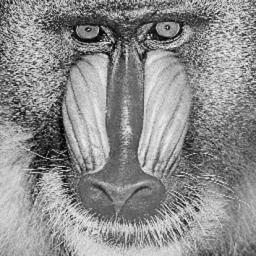

In [103]:
img_mat = image2array("Mandrill.png")
displayImage(img_mat)

Let's construct the Gaussian Kernel now. We take samples from the function upto $3\sigma$ on each side wherein the Gaussian almost decays completely. We ensure that the kernel always remains of an odd length. 

In [107]:
def get_kernel(sigma):
    if np.ceil(6 * sigma + 1) % 2 == 0:
        size = np.ceil(6 * sigma + 1) + 1
    else:
        size = np.ceil(6 * sigma + 1)
    
    grid_size = (size-1)/2

    x, y = np.meshgrid(np.arange(-grid_size, grid_size+1), np.arange(-grid_size, grid_size+1))
    
    # gaussian kernel
    if size == 1:  # zero sigma
        kernel = np.ones((1, 1))
    else:
        kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # normalize
    kernel /= np.sum(kernel)

    return kernel    

Now lets work out the blurring function. Zero-padding is done so as to avoid having to check image boundaries in the loop.  

In [105]:
def gaussian_blur(image_mat, sigma):
    # get kernel
    kernel = get_kernel(sigma)

    # half kernel size
    hksize = int((kernel.shape[0] - 1) / 2)

    # initialize output image
    blurred_img_mat = np.zeros(image_mat.shape).astype(np.uint8)

    # zero padding
    image_mat_padded = np.pad(image_mat, (hksize, hksize), "constant", constant_values=(0, 0))

    M = kernel.shape[0]  # kernel size
    
    for i in range(blurred_img_mat.shape[0]):
        for j in range(blurred_img_mat.shape[1]):
            conv = image_mat_padded[i:i+M, j:j+M] * kernel
            blurred_img_mat[i, j] = np.sum(conv)

    return blurred_img_mat


Sigma =  1.6


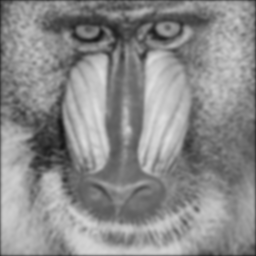

Sigma =  1.2


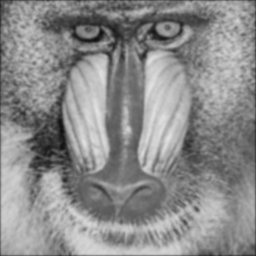

Sigma =  1.0


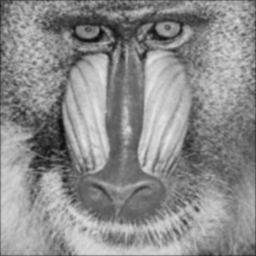

Sigma =  0.6


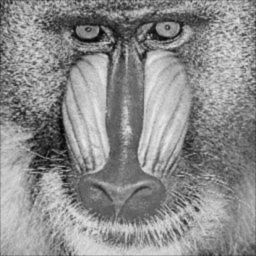

Sigma =  0.3


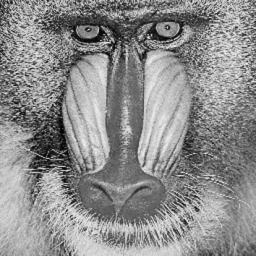

Sigma =  0.0


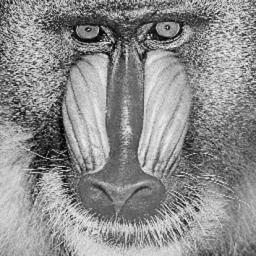

In [108]:
sigmas = [1.6, 1.2, 1.0, 0.6, 0.3, 0.0]

for s in sigmas:
    print("Sigma = ", s)
    blurred_image = gaussian_blur(img_mat, s)
    saveArrAsImage(blurred_image, f"sigma{s}.png", "PNG")
    displayImage(blurred_image)

### Conclusion
$\sigma$ is directly proportional to the blur effect. As it approaches zero, the blur weakens and we get the original image. Blurring also gives a sense of depth and focus in the image, how a wildlife photographer would see.